一种方法是使用合适的指纹技术将化合物矢量化并评估他们之间的距离。这种方法经常被使用，但是对于人类很难直观地理解化合物之间的距离。

基于Murcko骨架，分子大致聚集在化合物骨架中，并且每个簇中的顶部化合物都作为候选化合物。此方法非常符合人类的直觉，因此可以预期人将通过查看候选化合物列表来自动缩小化合物的范围。

Murcko骨架通过从化合物中去除多余的侧链并仅表达连接它们的“环结构”和“连接子”，可以执行更简单的化合物表达。

In [1]:
import csv

import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

In [2]:
# 载入数据
csv_file = "C:/Users/KerryChen/Desktop/Anni-clustering.csv"
csv_reader = csv.reader(open(csv_file))
next(csv_reader)
data = []
for line in csv_reader:
    sml = line[2]
    mol = Chem.MolFromSmiles(sml)

    if mol:
        data.append(mol)
n = len(data)

np.random.seed(1234)
np.random.shuffle(data)

In [3]:
# 提取骨架
smi_scaffolds = [MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=False) for mol in data]
mol_scaffolds = [Chem.MolFromSmiles(smi_scaffold) for smi_scaffold in smi_scaffolds]

In [4]:
# 可视化原始化合物前6个
Draw.MolsToGridImage(data[:6], molsPerRow=3, subImgSize=(300,300))

img = Draw.MolsToGridImage(data[:6], 
                           molsPerRow=3,
                           subImgSize=(300, 300), 
                           legends= "Original_6",
                           returnPNG=False)
img.save('Original_6.png')

In [5]:
# 可视化骨架化合物前6个
Draw.MolsToGridImage(mol_scaffolds[:6], molsPerRow=3, subImgSize=(300,300))

img = Draw.MolsToGridImage(mol_scaffolds[:6], 
                           molsPerRow=3,
                           subImgSize=(300, 300), 
                           legends= "Scaffold_6",
                           returnPNG=False)
img.save('Scaffold_6.png')

In [6]:
# 基于Murcko骨架聚类
scaffolds = {}
clusters_list =[]
 
 
idx = 1
for mol in data:
    scaffold_smi =  MurckoScaffold.MurckoScaffoldSmiles(mol=mol, includeChirality=False)
    if scaffold_smi not in scaffolds.keys():
        scaffolds[scaffold_smi] = idx
        idx+=1
        
    cluster_id = scaffolds[scaffold_smi]
    clusters_list.append(cluster_id)
print("Num of dataset:",len(data))
print("Num of Murcko scaffolds in dataset:",len(scaffolds.keys()))

Num of dataset: 238
Num of Murcko scaffolds in dataset: 208


In [7]:
# 查看每个分子对应的簇
clusters_list = np.array(clusters_list)
for key,value in enumerate(clusters_list):
    print(key+1, value)

print('-'*100)

from collections import Counter
Counter(clusters_list)

1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 3
35 34
36 35
37 36
38 37
39 38
40 39
41 40
42 41
43 42
44 43
45 44
46 45
47 46
48 47
49 48
50 49
51 50
52 51
53 52
54 53
55 54
56 55
57 56
58 57
59 58
60 59
61 60
62 61
63 62
64 63
65 64
66 65
67 66
68 67
69 68
70 24
71 69
72 70
73 71
74 72
75 73
76 74
77 75
78 76
79 77
80 78
81 79
82 80
83 81
84 82
85 83
86 84
87 85
88 86
89 87
90 88
91 89
92 12
93 32
94 90
95 91
96 92
97 93
98 12
99 94
100 95
101 96
102 97
103 98
104 99
105 100
106 101
107 43
108 24
109 102
110 103
111 90
112 104
113 105
114 69
115 106
116 107
117 108
118 109
119 110
120 111
121 43
122 112
123 113
124 114
125 115
126 70
127 116
128 117
129 118
130 119
131 120
132 121
133 24
134 122
135 123
136 12
137 124
138 125
139 126
140 127
141 128
142 129
143 57
144 130
145 131
146 87
147 132
148 133
149 134
150 135
151 136
152 137
153 138
154 139


Counter({1: 1,
         2: 1,
         3: 3,
         4: 1,
         5: 2,
         6: 1,
         7: 1,
         8: 1,
         9: 1,
         10: 1,
         11: 1,
         12: 5,
         13: 1,
         14: 1,
         15: 1,
         16: 1,
         17: 1,
         18: 1,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 1,
         24: 4,
         25: 1,
         26: 1,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         31: 1,
         32: 2,
         33: 1,
         34: 1,
         35: 2,
         36: 1,
         37: 1,
         38: 1,
         39: 1,
         40: 1,
         41: 1,
         42: 1,
         43: 4,
         44: 1,
         45: 1,
         46: 1,
         47: 1,
         48: 1,
         49: 1,
         50: 1,
         51: 1,
         52: 1,
         53: 1,
         54: 1,
         55: 1,
         56: 1,
         57: 2,
         58: 1,
         59: 1,
         60: 1,
         61: 1,
         62: 1,
         63: 1,
 

----------------------------------------------------------------------------------------------------


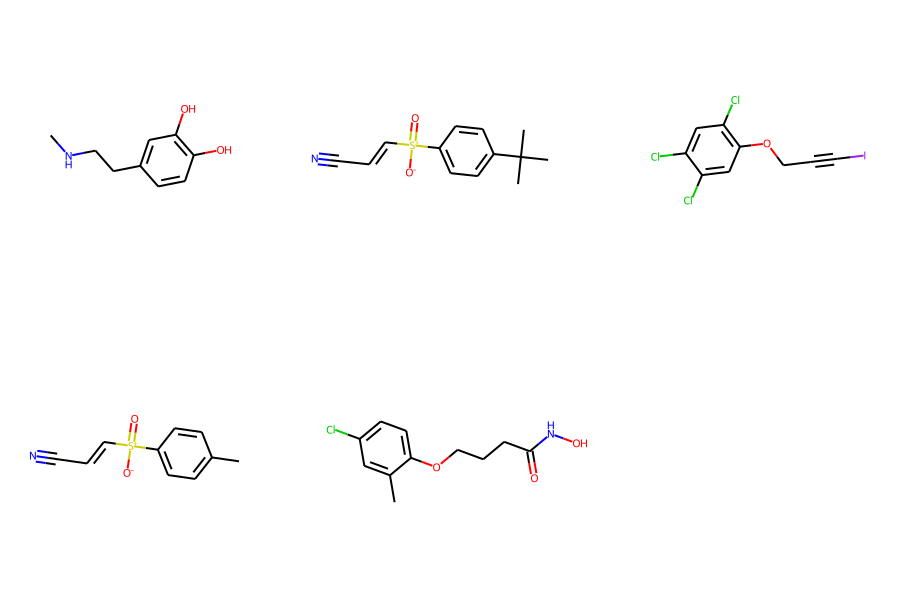

In [8]:
idx_c15 = np.where(clusters_list==12)[0]
mol_list_c15 = [data[i] for i in idx_c15]

img = Draw.MolsToGridImage(mol_list_c15, 
                           molsPerRow=3,
                           subImgSize=(300, 300), 
                           legends= "Group: " + "87",
                           returnPNG=False)
img.save('Group12.png')

print('-'*100)
Draw.MolsToGridImage(mol_list_c15, molsPerRow=3, subImgSize=(300,300))

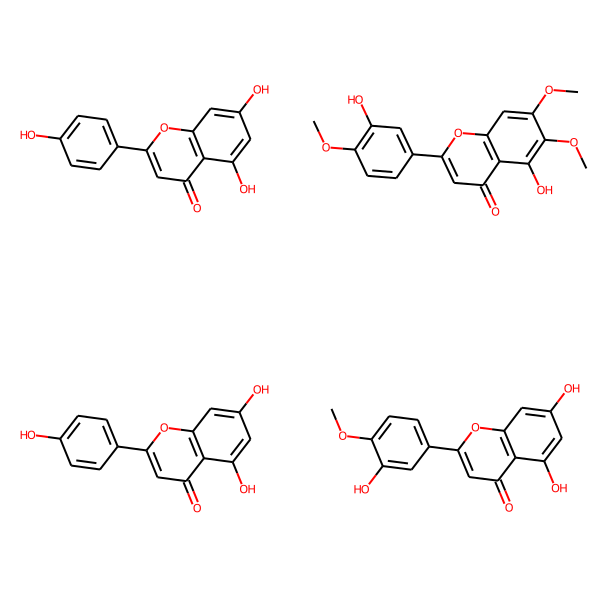

In [9]:
idx_c15 = np.where(clusters_list==43)[0]
mol_list_c15 = [data[i] for i in idx_c15]

img = Draw.MolsToGridImage(mol_list_c15, 
                           molsPerRow=2,
                           subImgSize=(300, 300), 
                           legends= "Group: " + "88",
                           returnPNG=False)
img.save('Group43.png')

Draw.MolsToGridImage(mol_list_c15, molsPerRow=2, subImgSize=(300,300))